In [ ]:
# 1. Setup & Data Loading
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



# Load dataset (upload vgsales.csv to Colab or mount Drive)
df = pd.read_csv("vgsales.csv")
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# Basic info
print(df.shape)
print(df.dtypes)
df.isna().sum()


(16598, 11)
Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
df = pd.read_csv("vgsales.csv")

# Clean small missing values smartly
df["Year"] = df["Year"].fillna(df["Year"].median()).astype(int)
df["Publisher"] = df["Publisher"].fillna("Unknown")

# Create target variable
df["Hit"] = (df["Global_Sales"] >= 1.0).astype(int)


In [ ]:
df.isna().sum()


,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


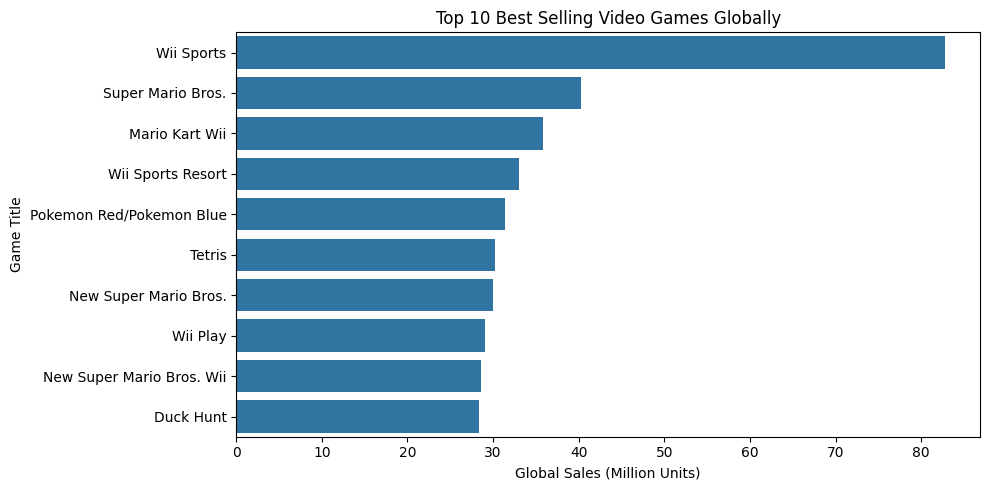

In [ ]:
# Top 10 Best Selling Games in Gobal sales
top_games = df.sort_values(by="Global_Sales", ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_games, y="Name", x="Global_Sales")
plt.title("Top 10 Best Selling Video Games Globally")
plt.xlabel("Global Sales (Million Units)")
plt.ylabel("Game Title")
plt.tight_layout()
plt.show()


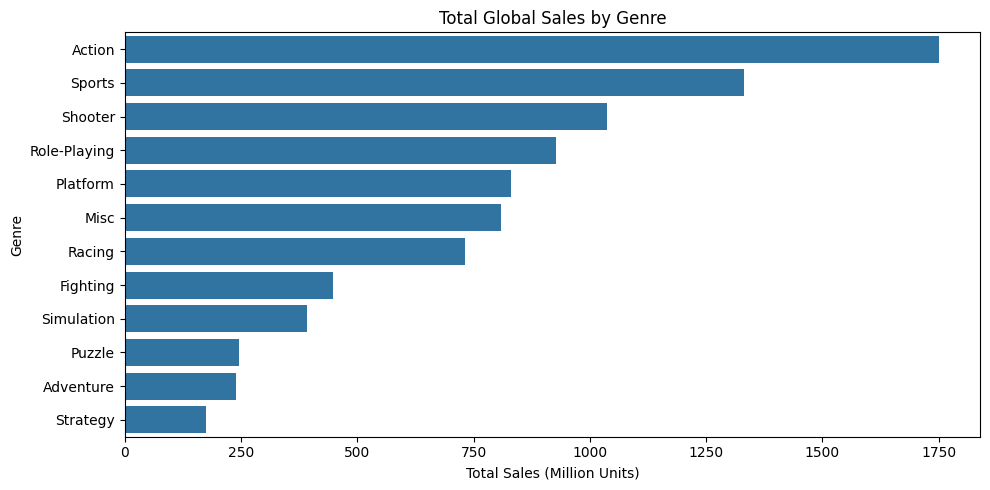

In [ ]:
plt.figure(figsize=(10,5))
genre_sales = df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)
sns.barplot(x=genre_sales.values, y=genre_sales.index)
plt.title("Total Global Sales by Genre")
plt.xlabel("Total Sales (Million Units)")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


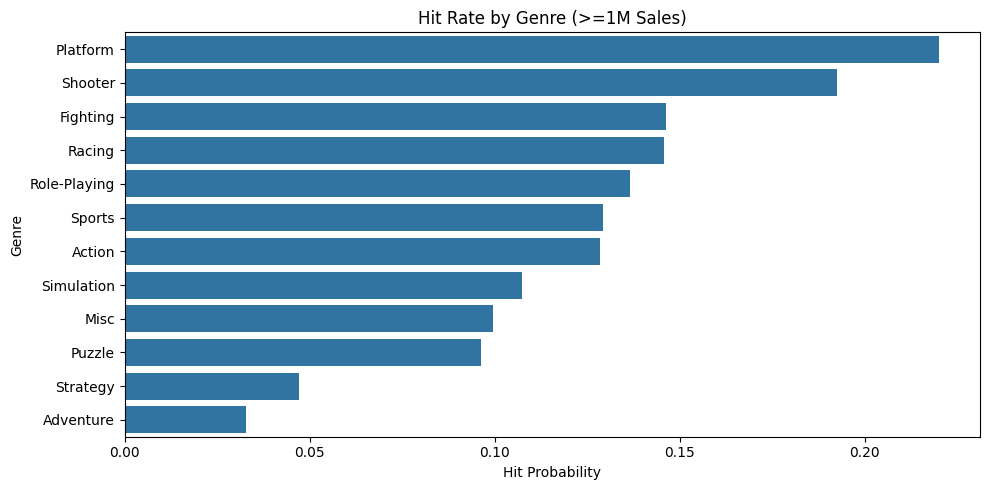

In [ ]:
genre_hit = df.groupby("Genre")["Hit"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=genre_hit.values, y=genre_hit.index)
plt.title("Hit Rate by Genre (>=1M Sales)")
plt.xlabel("Hit Probability")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


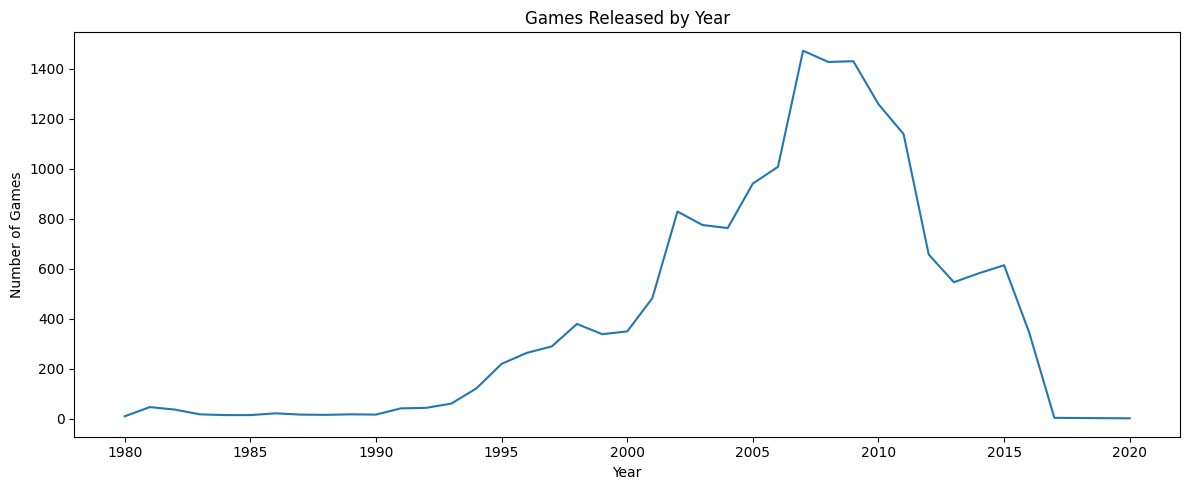

In [ ]:
year_count = df.groupby("Year")["Name"].count()

plt.figure(figsize=(12,5))
sns.lineplot(x=year_count.index, y=year_count.values)
plt.title("Games Released by Year")
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.tight_layout()
plt.show()


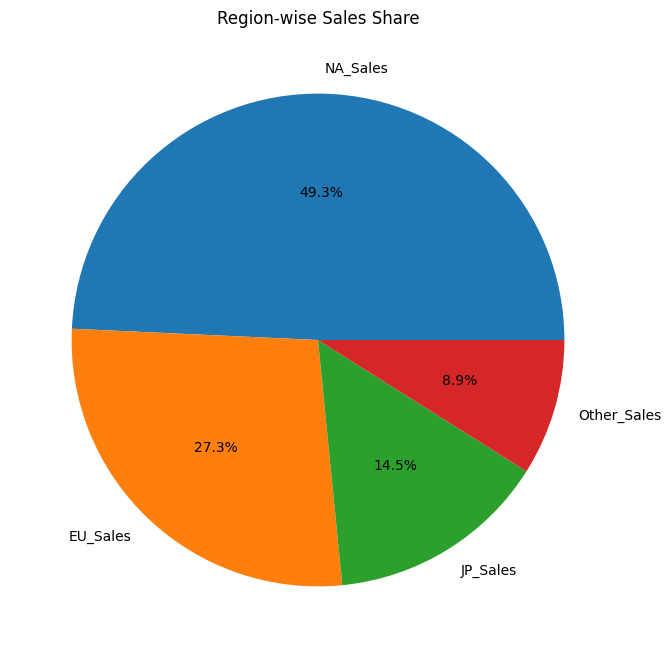

In [ ]:
plt.figure(figsize=(8,8))
sales_region = df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].sum()

plt.pie(sales_region[:-1], labels=sales_region.index[:-1], autopct='%1.1f%%')
plt.title("Region-wise Sales Share")
plt.show()


In [ ]:
!pip install plotly -q

import plotly.express as px


In [ ]:
platform_sales = (
    df.groupby("Platform", as_index=False)["Global_Sales"]
      .sum()
      .sort_values("Global_Sales", ascending=False)
)

fig = px.bar(
    platform_sales.head(15),
    x="Platform",
    y="Global_Sales",
    title="Total Global Sales by Console (Top 15 Platforms)",
    labels={"Global_Sales": "Global Sales (Million Units)", "Platform": "Console"},
    hover_data={"Global_Sales": ":.2f"}
)

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


In [ ]:
platform_hit = (
    df.groupby("Platform", as_index=False)["Hit"]
      .mean()
      .rename(columns={"Hit": "Hit_Rate"})
      .sort_values("Hit_Rate", ascending=False)
)

fig = px.bar(
    platform_hit,
    x="Platform",
    y="Hit_Rate",
    title="Hit Rate (≥ 1M Sales) by Console",
    labels={"Hit_Rate": "Hit Rate", "Platform": "Console"},
    hover_data={"Hit_Rate": ":.2f"}
)

fig.show()


In [ ]:
# Focus only on major consoles to avoid noise
major_platforms = ["PS2", "PS3", "Wii", "X360", "PS4", "DS", "3DS","PC"]
df_major = df[df["Platform"].isin(major_platforms)]

fig = px.scatter(
    df_major,
    x="Year",
    y="Global_Sales",
    color="Platform",
    size="Global_Sales",
    hover_name="Name",
    title="Game Sales over Time by Console (Major Platforms)",
    labels={"Global_Sales": "Global Sales (Million Units)"}
)

fig.show()


In [ ]:
top23 = df.sort_values("Global_Sales", ascending=False).head(23)


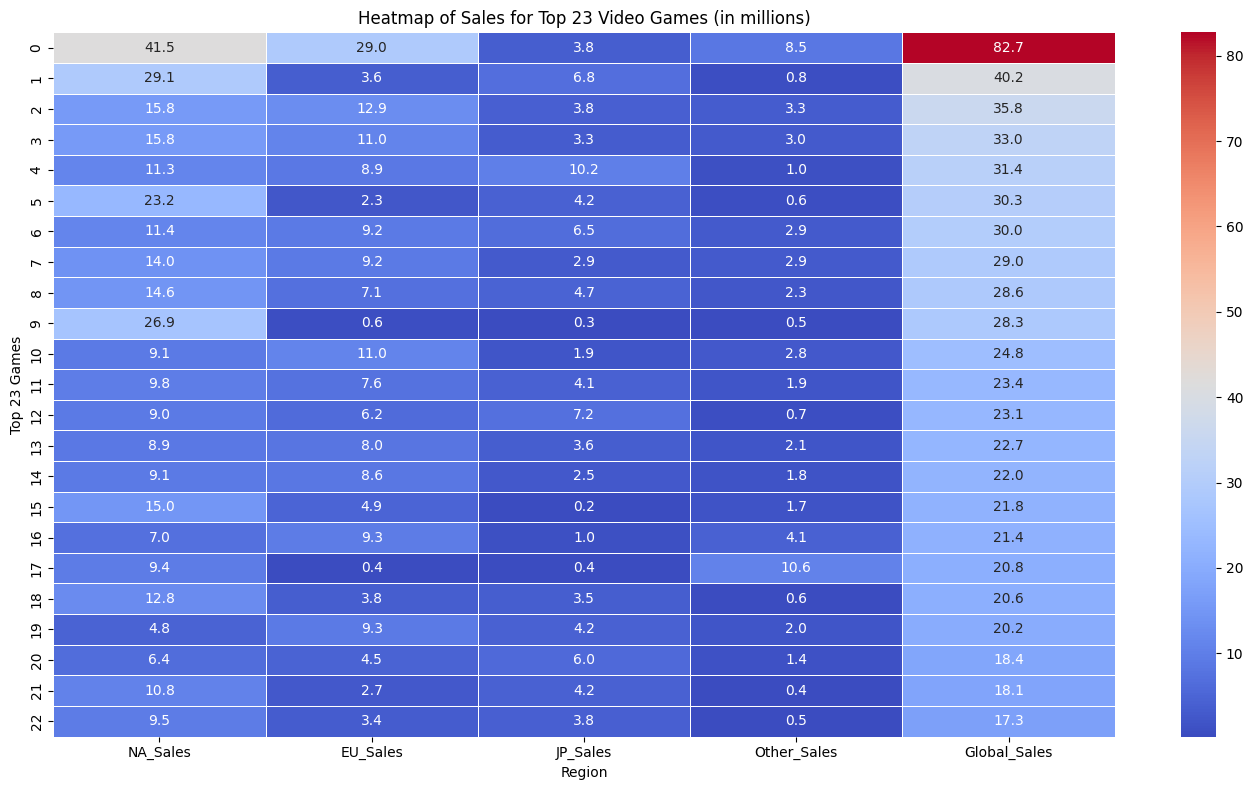

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric sales columns
sales_cols = ["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]

plt.figure(figsize=(14,8))
sns.heatmap(
    top23[sales_cols],
    annot=True,
    cmap="coolwarm",
    linewidths=.5,
    cbar=True,
    fmt=".1f"
)

plt.title("Heatmap of Sales for Top 23 Video Games (in millions)")
plt.xlabel("Region")
plt.ylabel("Top 23 Games")
plt.tight_layout()
plt.show()


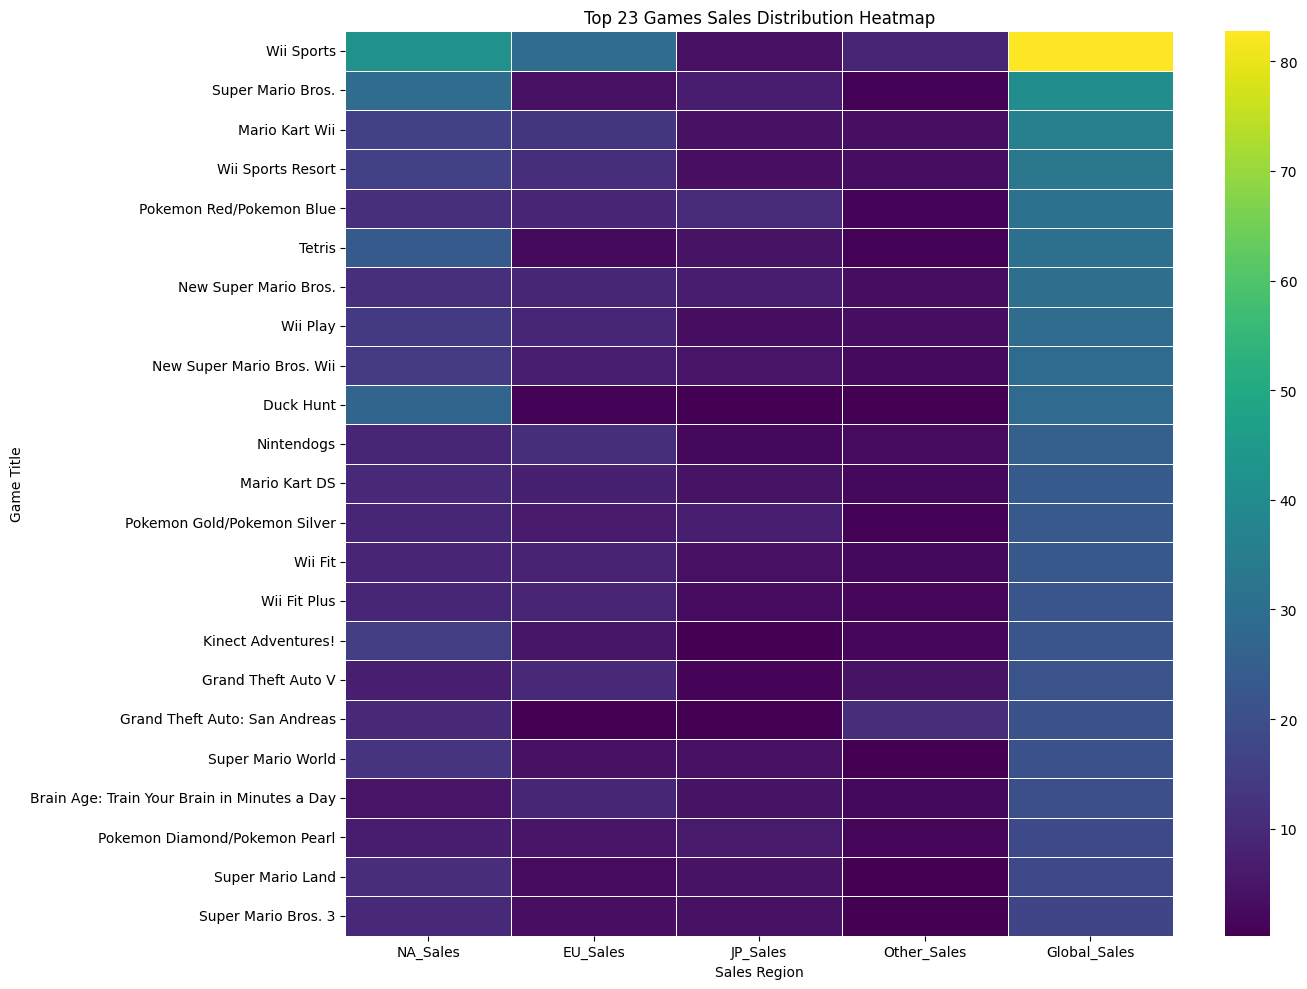

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(
    top23.set_index("Name")[sales_cols],
    annot=False,
    cmap="viridis",
    linewidths=.4
)
plt.title("Top 23 Games Sales Distribution Heatmap")
plt.xlabel("Sales Region")
plt.ylabel("Game Title")
plt.tight_layout()
plt.show()


In [ ]:
!pip install plotly -q

import plotly.express as px
import plotly.graph_objects as go

# Make sure Hit exists
df["Year"] = df["Year"].fillna(df["Year"].median()).astype(int)
df["Publisher"] = df["Publisher"].fillna("Unknown")
df["Hit"] = (df["Global_Sales"] >= 1.0).astype(int)


In [ ]:
# Aggregate at Genre - Platform level
agg = (
    df.groupby(["Genre", "Platform"], as_index=False)
      .agg(
          Total_Global_Sales=("Global_Sales", "sum"),
          Num_Games=("Name", "count"),
          Hit_Rate=("Hit", "mean")
      )
)

fig = px.sunburst(
    agg,
    path=["Genre", "Platform"],
    values="Total_Global_Sales",
    color="Hit_Rate",
    color_continuous_scale="RdBu",
    title="Video Game Market Map - Genre to Platform (Sized by Global Sales, Colored by Hit Rate)",
    hover_data={
        "Total_Global_Sales": ":.2f",
        "Num_Games": True,
        "Hit_Rate": ":.2f"
    }
)

fig.update_layout(margin=dict(t=80, l=0, r=0, b=0))
fig.show()


In [ ]:
# Keep reasonable years
df_anim = df[(df["Year"] >= 1985) & (df["Year"] <= 2016)]

year_platform_sales = (
    df_anim
    .groupby(["Year", "Platform"], as_index=False)["Global_Sales"]
    .sum()
)

fig = px.bar(
    year_platform_sales,
    x="Platform",
    y="Global_Sales",
    color="Platform",
    animation_frame="Year",
    range_y=[0, year_platform_sales["Global_Sales"].max() * 1.1],
    title="Console Wars - Global Sales by Platform Over Time",
    labels={
        "Global_Sales": "Global Sales (Million Units)",
        "Platform": "Console",
        "Year": "Year"
    }
)

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Aggregate per platform
plat_stats = (
    df.groupby("Platform", as_index=False)
      .agg(
          Total_Global_Sales=("Global_Sales", "sum"),
          Num_Games=("Name", "count"),
          Hit_Rate=("Hit", "mean")
      )
)

# Pick top 5 by Total Global Sales
top_plat = plat_stats.sort_values("Total_Global_Sales", ascending=False).head(5).reset_index(drop=True)

# Normalize features 0-1 for radar
features = ["Total_Global_Sales", "Num_Games", "Hit_Rate"]
scaler = MinMaxScaler()
scaled_vals = scaler.fit_transform(top_plat[features])

categories = ["Total Sales", "Number of Games", "Hit Rate"]
N = len(categories)

# Close the radar loop
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig = go.Figure()

for i, row in top_plat.iterrows():
    values = scaled_vals[i].tolist()
    values += values[:1]
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories + [categories[0]],
        fill="toself",
        name=row["Platform"]
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1])
    ),
    title="Performance Profile of Top 5 Consoles",
    showlegend=True
)

fig.show()
